第一大和第二大点的中心坐标为: (1166, 1634)


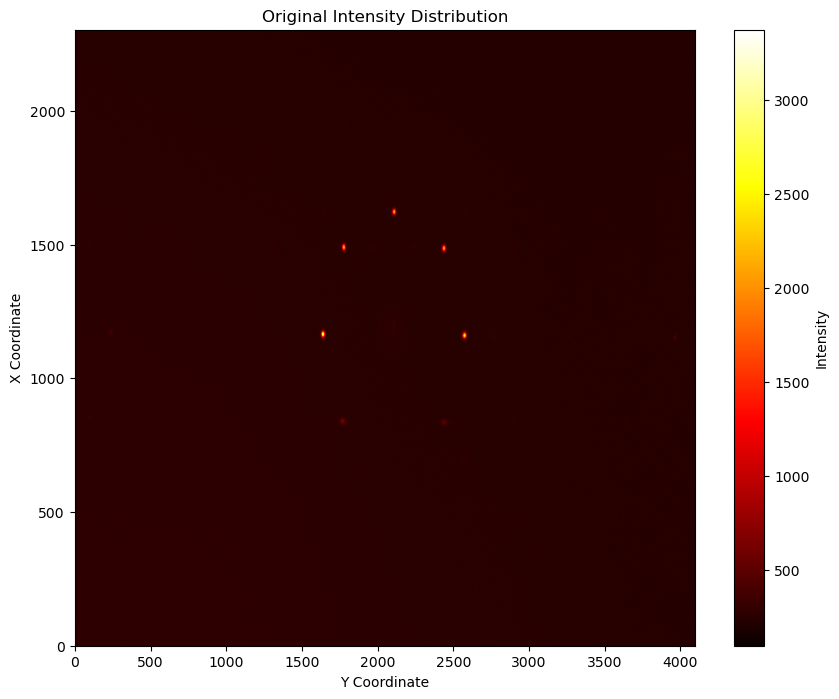

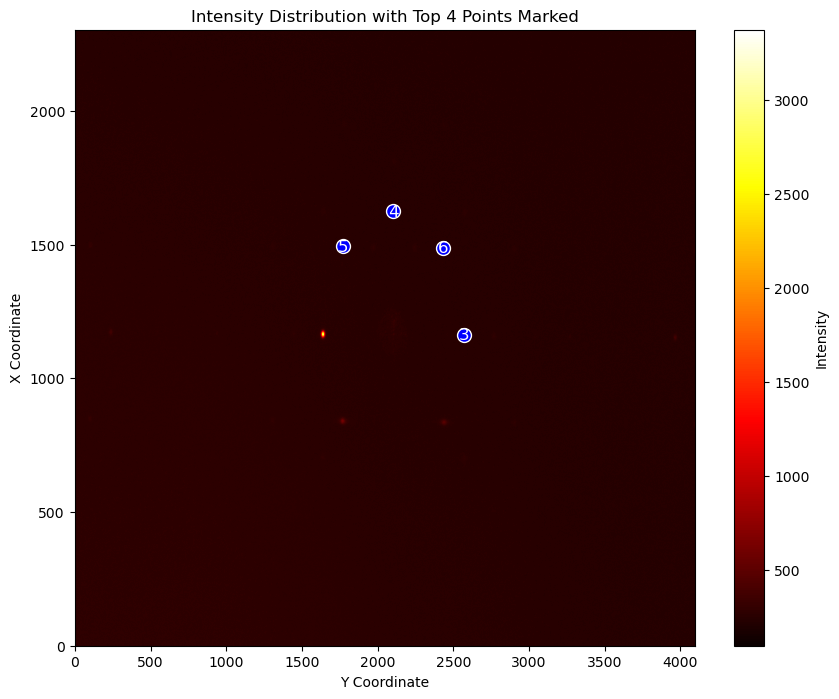

第3大光强为: 3087.0，位置为: (1161, 2570)
第4大光强为: 2751.0，位置为: (1624, 2103)
第5大光强为: 2683.0，位置为: (1493, 1774)
第6大光强为: 2600.0，位置为: (1486, 2432)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取Excel文件
file_path = r'E:\桌面\wkx1\程序\HCL\数据\24.8.1\新建文件夹\base.xlsx'
df = pd.read_excel(file_path, index_col=0)

# 将所有数据转换为浮点类型，避免类型不兼容的警告
df = df.astype(float)

# 保存原始数据以备后续绘图
df_original = df.copy()

# 初始化列表来存储最大值及其坐标
top_values = []
top_positions = []

# 首先找到第一大和第二大光强点
for i in range(2):
    max_intensity = df.max().max()
    max_position = df.stack().idxmax()

    # 保存最大光强及其坐标
    top_values.append(max_intensity)
    top_positions.append(max_position)

    # 将找到的最大值设为负无穷大
    df.loc[max_position[0], max_position[1]] = float('-inf')

# 计算第一大和第二大点的中心坐标
center = ((top_positions[0][0] + top_positions[1][0]) // 2, 
          (top_positions[0][1] + top_positions[1][1]) // 2)
print(f"第一大和第二大点的中心坐标为: {center}")

# 根据中心坐标找另外四个点
while len(top_values) < 6:
    max_intensity = df.max().max()
    max_position = df.stack().idxmax()

    # 检查距离已选最大光强点是否在50范围内
    if any(np.sqrt((max_position[0] - pos[0])**2 + (max_position[1] - pos[1])**2) <= 50 for pos in top_positions):
        df.loc[max_position[0], max_position[1]] = float('-inf')
        continue

    # 检查与中心对称点是否在50范围内
    symmetric_position = (2*center[0] - max_position[0], 2*center[1] - max_position[1])
    if any(np.sqrt((symmetric_position[0] - pos[0])**2 + (symmetric_position[1] - pos[1])**2) <= 50 for pos in top_positions):
        df.loc[max_position[0], max_position[1]] = float('-inf')
        continue

    # 保存有效的最大光强及其坐标
    top_values.append(max_intensity)
    top_positions.append(max_position)

    # 将找到的最大值及其周围50个单位的光强值设为负无穷大
    x, y = max_position
    df.loc[max(x-50, df.index.min()):min(x+50, df.index.max()), 
           max(y-50, df.columns.min()):min(y+50, df.columns.max())] = float('-inf')

# 绘制原始数据图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')
plt.title('Original Intensity Distribution')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.show()

# 绘制标记四个最大光强点的图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')

# 标记四个最大光强的位置
for i, (x, y) in enumerate(top_positions[2:], start=1):
    plt.scatter(y, x, color='blue', marker='o', s=100, edgecolor='white')
    plt.text(y, x, f'{i+2}', color='white', ha='center', va='center', fontsize=12)

plt.title('Intensity Distribution with Top 4 Points Marked')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.show()

# 输出这些点的光强和具体坐标
for i, (value, position) in enumerate(zip(top_values[2:], top_positions[2:]), start=1):
    print(f"第{i+2}大光强为: {value}，位置为: {position}")


In [13]:
import pandas as pd
import numpy as np

# 第一步：从base.xlsx中选出四个点并记住坐标

# 读取base.xlsx文件
base_file_path = r'E:\桌面\wkx1\程序\HCL\数据\24.8.1\新建文件夹\base.xlsx'
df_base = pd.read_excel(base_file_path, index_col=0)

# 将所有数据转换为浮点类型
df_base = df_base.astype(float)

# 保存原始数据以备后续操作
df_original_base = df_base.copy()

# 初始化列表来存储最大值及其坐标
top_values_base = []
top_positions_base = []

# 首先找到第一大和第二大光强点
for i in range(2):
    max_intensity = df_base.max().max()
    max_position = df_base.stack().idxmax()

    # 保存最大光强及其坐标
    top_values_base.append(max_intensity)
    top_positions_base.append(max_position)

    # 将找到的最大值设为负无穷大
    df_base.loc[max_position[0], max_position[1]] = float('-inf')

# 计算第一大和第二大点的中心坐标
center = ((top_positions_base[0][0] + top_positions_base[1][0]) // 2, 
          (top_positions_base[0][1] + top_positions_base[1][1]) // 2)
print(f"第一大和第二大点的中心坐标为: {center}")

# 根据中心坐标找另外四个点
while len(top_values_base) < 6:
    max_intensity = df_base.max().max()
    max_position = df_base.stack().idxmax()

    # 检查距离已选最大光强点是否在50范围内
    if any(np.sqrt((max_position[0] - pos[0])**2 + (max_position[1] - pos[1])**2) <= 50 for pos in top_positions_base):
        df_base.loc[max_position[0], max_position[1]] = float('-inf')
        continue

    # 检查与中心对称点是否在50范围内
    symmetric_position = (2*center[0] - max_position[0], 2*center[1] - max_position[1])
    if any(np.sqrt((symmetric_position[0] - pos[0])**2 + (symmetric_position[1] - pos[1])**2) <= 50 for pos in top_positions_base):
        df_base.loc[max_position[0], max_position[1]] = float('-inf')
        continue

    # 保存有效的最大光强及其坐标
    top_values_base.append(max_intensity)
    top_positions_base.append(max_position)

    # 将找到的最大值及其周围50个单位的光强值设为负无穷大
    x, y = max_position
    df_base.loc[max(x-50, df_base.index.min()):min(x+50, df_base.index.max()), 
                max(y-50, df_base.columns.min()):min(y+50, df_base.columns.max())] = float('-inf')

# 输出四个点的坐标
selected_positions = top_positions_base[2:]
print("选中的四个点的坐标为:")
for position in selected_positions:
    print(position)

# 第二步：从result.xlsx中读取这些点的数值大小

# 读取result.xlsx文件
result_file_path = r'E:\桌面\wkx1\程序\HCL\数据\24.8.1\新建文件夹\result.xlsx'
df_result = pd.read_excel(result_file_path, index_col=0)

# 获取这些坐标对应的数值
for position in selected_positions:
    value = df_result.loc[position]
    print(f"坐标{position}对应的数值为: {value}")


第一大和第二大点的中心坐标为: (1166, 1634)
选中的四个点的坐标为:
(1161, 2570)
(1624, 2103)
(1493, 1774)
(1486, 2432)
坐标(1161, 2570)对应的数值为: 433
坐标(1624, 2103)对应的数值为: 235
坐标(1493, 1774)对应的数值为: 291
坐标(1486, 2432)对应的数值为: 2163


第一大和第二大点的中心坐标为: (1166, 1634)
选中的四个点的坐标为:
(1161, 2570)
(1624, 2103)
(1493, 1774)
(1486, 2432)
坐标(1161, 2570)对应的数值为: 433
坐标(1624, 2103)对应的数值为: 235
坐标(1493, 1774)对应的数值为: 291
坐标(1486, 2432)对应的数值为: 2163


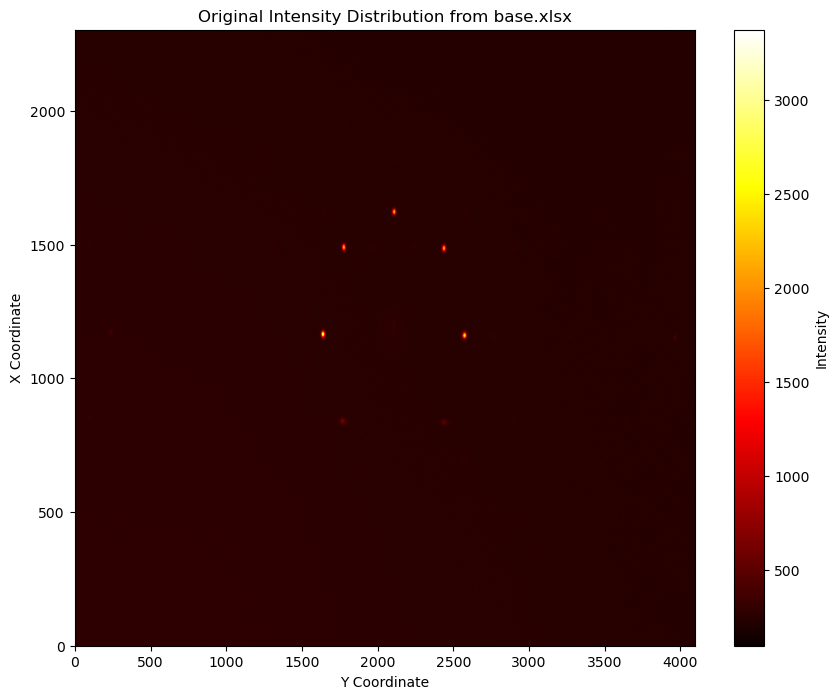

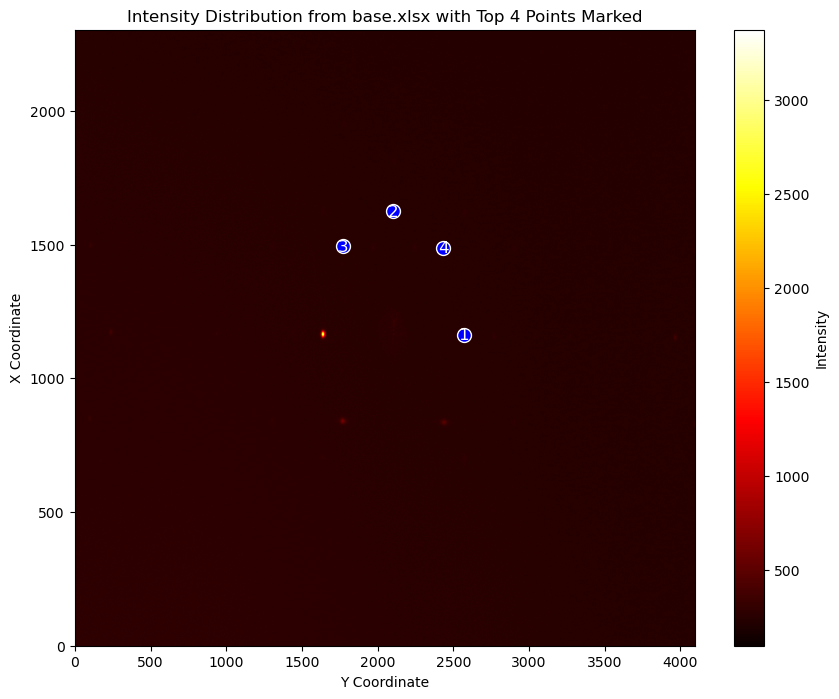

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 第一步：从base.xlsx中选出四个点并记住坐标

# 读取base.xlsx文件
base_file_path = r'E:\桌面\wkx1\程序\HCL\数据\24.8.1\新建文件夹\base.xlsx'
df_base = pd.read_excel(base_file_path, index_col=0)

# 将所有数据转换为浮点类型
df_base = df_base.astype(float)

# 保存原始数据以备后续操作
df_original_base = df_base.copy()

# 初始化列表来存储最大值及其坐标
top_values_base = []
top_positions_base = []

# 首先找到第一大和第二大光强点
for i in range(2):
    max_intensity = df_base.max().max()
    max_position = df_base.stack().idxmax()

    # 保存最大光强及其坐标
    top_values_base.append(max_intensity)
    top_positions_base.append(max_position)

    # 将找到的最大值设为负无穷大
    df_base.loc[max_position[0], max_position[1]] = float('-inf')

# 计算第一大和第二大点的中心坐标
center = ((top_positions_base[0][0] + top_positions_base[1][0]) // 2, 
          (top_positions_base[0][1] + top_positions_base[1][1]) // 2)
print(f"第一大和第二大点的中心坐标为: {center}")

# 根据中心坐标找另外四个点
while len(top_values_base) < 6:
    max_intensity = df_base.max().max()
    max_position = df_base.stack().idxmax()

    # 检查距离已选最大光强点是否在50范围内
    if any(np.sqrt((max_position[0] - pos[0])**2 + (max_position[1] - pos[1])**2) <= 50 for pos in top_positions_base):
        df_base.loc[max_position[0], max_position[1]] = float('-inf')
        continue

    # 检查与中心对称点是否在50范围内
    symmetric_position = (2*center[0] - max_position[0], 2*center[1] - max_position[1])
    if any(np.sqrt((symmetric_position[0] - pos[0])**2 + (symmetric_position[1] - pos[1])**2) <= 50 for pos in top_positions_base):
        df_base.loc[max_position[0], max_position[1]] = float('-inf')
        continue

    # 保存有效的最大光强及其坐标
    top_values_base.append(max_intensity)
    top_positions_base.append(max_position)

    # 将找到的最大值及其周围50个单位的光强值设为负无穷大
    x, y = max_position
    df_base.loc[max(x-50, df_base.index.min()):min(x+50, df_base.index.max()), 
                max(y-50, df_base.columns.min()):min(y+50, df_base.columns.max())] = float('-inf')

# 输出四个点的坐标
selected_positions = top_positions_base[2:]
print("选中的四个点的坐标为:")
for position in selected_positions:
    print(position)

# 第二步：从result.xlsx中读取这些点的数值大小

# 读取result.xlsx文件
result_file_path = r'E:\桌面\wkx1\程序\HCL\数据\24.8.1\新建文件夹\result.xlsx'
df_result = pd.read_excel(result_file_path, index_col=0)

# 获取这些坐标对应的数值
for position in selected_positions:
    value = df_result.loc[position]
    print(f"坐标{position}对应的数值为: {value}")

# 第三步：绘制原始图像和标记选定点的图像

# 绘制base.xlsx的原始图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original_base, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')
plt.title('Original Intensity Distribution from base.xlsx')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.show()

# 绘制标记四个最大光强点的图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original_base, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')

# 标记四个最大光强的位置
for i, (x, y) in enumerate(selected_positions, start=1):
    plt.scatter(y, x, color='blue', marker='o', s=100, edgecolor='white')
    plt.text(y, x, f'{i}', color='white', ha='center', va='center', fontsize=12)

plt.title('Intensity Distribution from base.xlsx with Top 4 Points Marked')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.show()
